In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#데이터준비
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

#정규분포의 STD는 1
x, y = make_blobs(n_samples=50, centers= 5, random_state= 42, cluster_std= 2)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

mms_train = MinMaxScaler()
mms_test = MinMaxScaler()
x_train_scaled = mms_train.fit_transform(x_train)
x_test_scaled = mms_test.fit_transform(x_test) #테스트데이터는 fit하면 안된다 이유는 아래표
x_test_scaled2 = mms_train.transform(x_test)

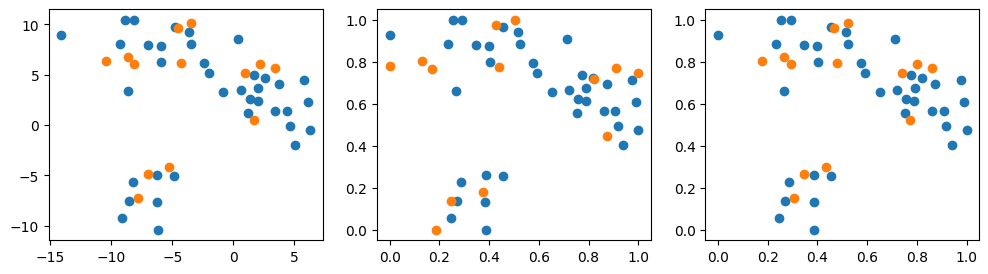

In [3]:
fig, axes = plt.subplots(1, 3, figsize = (12, 3))
axes[0].scatter(x_train[:,0], x_train[:,1])
axes[0].scatter(x_test[:,0], x_test[:,1])

axes[1].scatter(x_train_scaled[:,0], x_train_scaled[:,1])
axes[1].scatter(x_test_scaled[:,0], x_test_scaled[:,1])

axes[2].scatter(x_train_scaled[:,0], x_train_scaled[:,1])
axes[2].scatter(x_test_scaled2[:,0], x_test_scaled2[:,1])

plt.show()


In [4]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer

bc_dataset = load_breast_cancer()

x = bc_dataset['data']
y = bc_dataset['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)


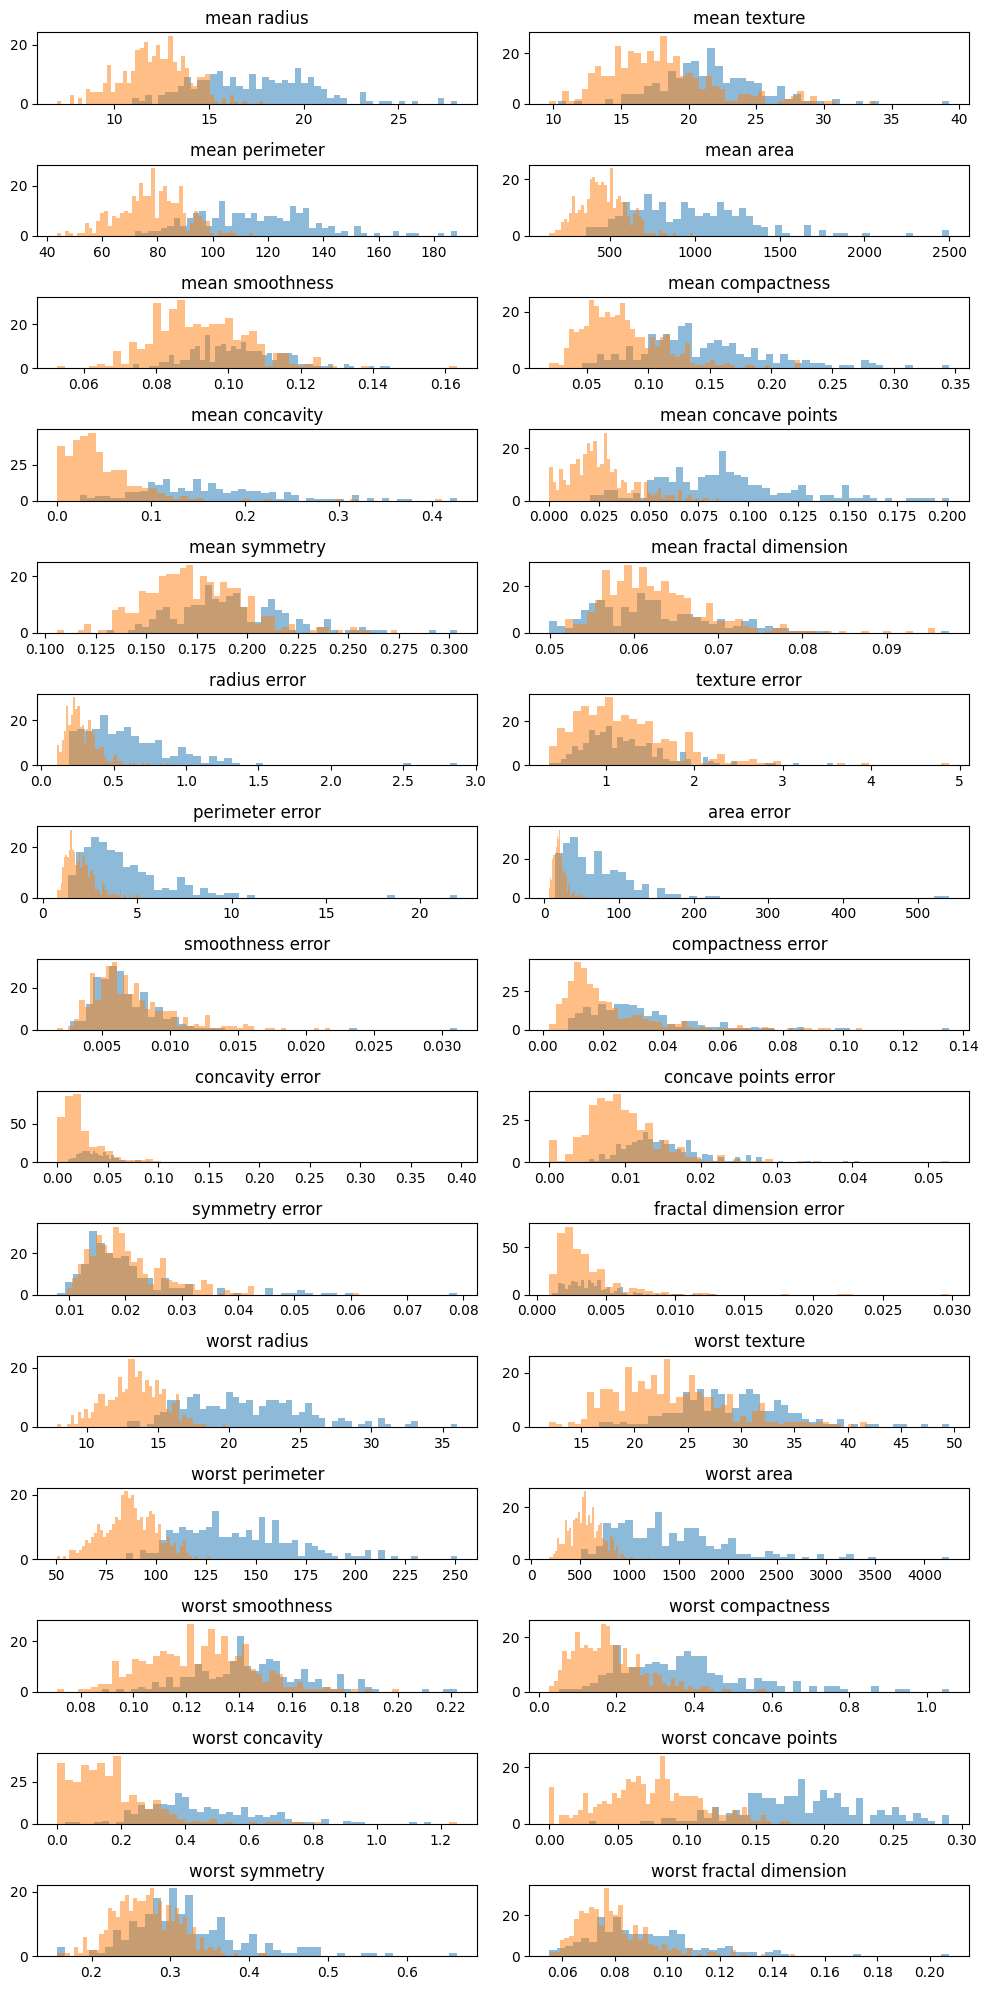

In [5]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
axes = axes.flatten() # n차원을 1차원으로 바꾸는 함수
for idx, ax in enumerate(axes):
    ax.hist(x[y==0, idx], bins=50, alpha=0.5)
    ax.hist(x[y==1, idx], bins=50, alpha=0.5)
    ax.set_title(bc_dataset['feature_names'][idx])

fig.tight_layout()
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

ssc = StandardScaler()
x_train_scaled = ssc.fit_transform(x_train) #PCA 적용 전에 정규분포로 변환하는 것을 권장한다.

pca = PCA(n_components= 2)
#pca = PCA(n_components= 10)
pca.fit(x_train_scaled)

x_train_pca = pca.transform(x_train_scaled)

x_train.shape, x_train_pca.shape


((426, 30), (426, 2))

In [7]:
print(x_train_scaled.shape, pca.components_.shape, x_train_pca.shape)
print(pca.explained_variance_, pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

(426, 30) (2, 30) (426, 2)
[13.19960138  5.86946172] [0.43895388 0.19518945]


np.float64(0.6341433349580669)

In [8]:
from sklearn.linear_model import LogisticRegression

logleg1 = LogisticRegression(max_iter= 10000)
logleg1.fit(x_train_scaled, y_train)

logleg2 = LogisticRegression(max_iter= 10000)
logleg2.fit(x_train_pca, y_train)


logleg1.score(x_train_scaled, y_train), logleg2.score(x_train_pca, y_train)

(0.9882629107981221, 0.9624413145539906)

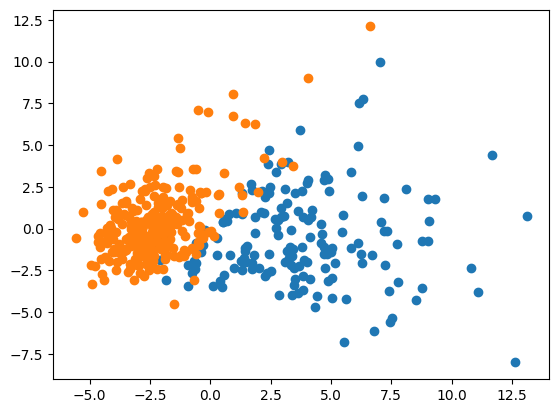

In [9]:
plt.scatter(x_train_pca[y_train==0, 0], x_train_pca[y_train==0, 1])
plt.scatter(x_train_pca[y_train==1, 0], x_train_pca[y_train==1, 1])
plt.show()


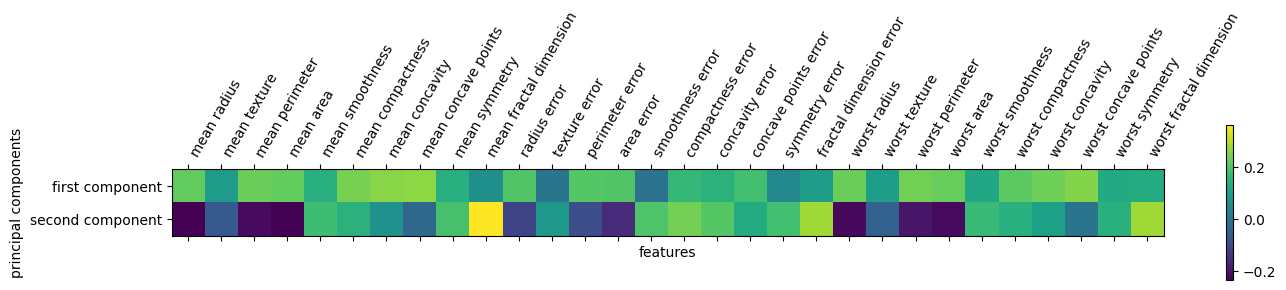

In [10]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(bc_dataset['feature_names'])),
           bc_dataset['feature_names'], rotation=60, ha='left')
plt.xlabel("features")
plt.ylabel("principal components")
plt.show()

In [11]:
# 각 주성분이 데이터의 분산에서 차지하는 비율 (퍼센트로 변환)
explained_variance_ratio = pca.explained_variance_ratio_ * 100

# 주성분별 기여율 출력
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.2f}%")


Principal Component 1: 43.90%
Principal Component 2: 19.52%


                    Feature  Contribution (%)
7       mean concave points          5.246725
6            mean concavity          5.151594
27     worst concave points          5.026200
5          mean compactness          4.826122
22          worst perimeter          4.735253
26          worst concavity          4.627017
20             worst radius          4.567164
2            mean perimeter          4.562382
23               worst area          4.495556
3                 mean area          4.433646
0               mean radius          4.392332
25        worst compactness          4.231535
12          perimeter error          4.122412
13               area error          4.021911
10             radius error          4.007125
17     concave points error          3.663871
15        compactness error          3.287450
16          concavity error          3.004555
4           mean smoothness          2.877786
8             mean symmetry          2.801220
29  worst fractal dimension       

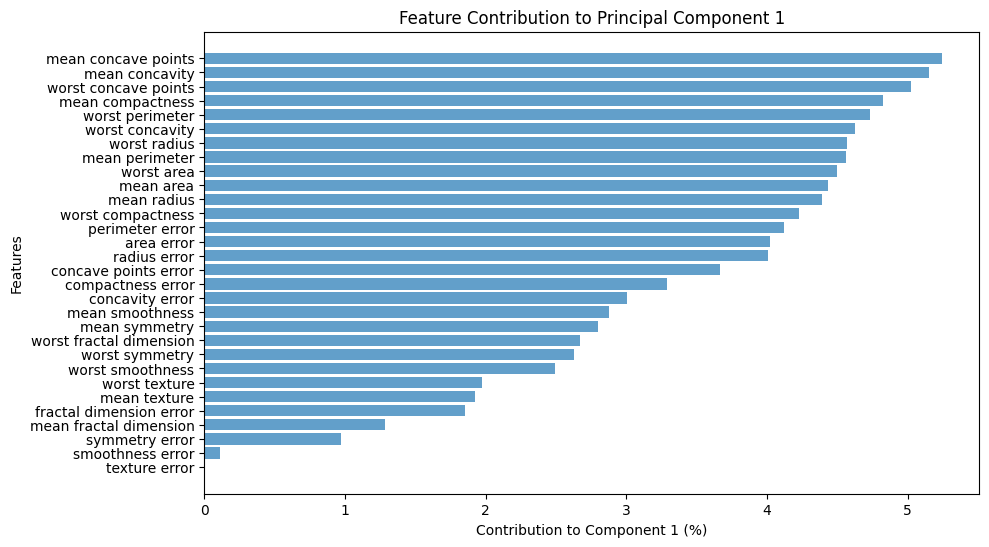

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PCA 주성분 (components_)
components = pca.components_

# Component 1의 각 특성 기여도 계산
component_1_contribution = np.abs(components[0]) / np.sum(np.abs(components[0])) * 100

# 특성 이름과 함께 데이터프레임으로 정리
features = bc_dataset['feature_names']
contribution_df = pd.DataFrame({
    'Feature': features,
    'Contribution (%)': component_1_contribution
}).sort_values(by='Contribution (%)', ascending=False)

# 출력
print(contribution_df)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(contribution_df['Feature'], contribution_df['Contribution (%)'], alpha=0.7)
plt.gca().invert_yaxis()  # 가장 중요한 특성이 위로 오도록
plt.xlabel('Contribution to Component 1 (%)')
plt.ylabel('Features')
plt.title('Feature Contribution to Principal Component 1')
plt.show()


In [13]:
#!pip install mglearn
import mglearn

(2000, 3)


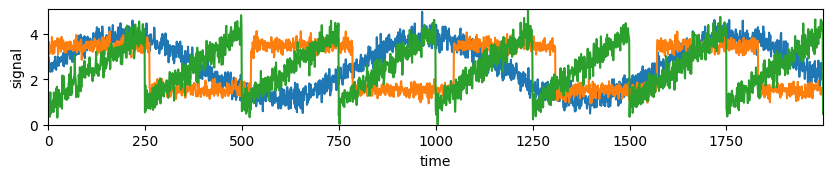

In [14]:
S = mglearn.datasets.make_signals()
print(S.shape)
plt.figure(figsize=(10, 1.5))
plt.plot(S, '-')
plt.xlabel("time")
plt.ylabel("signal")
plt.margins(0)

In [15]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듭니다
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태:", X.shape)

측정 데이터 형태: (2000, 100)


In [16]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S_.shape)

복원한 신호 데이터 형태: (2000, 3)


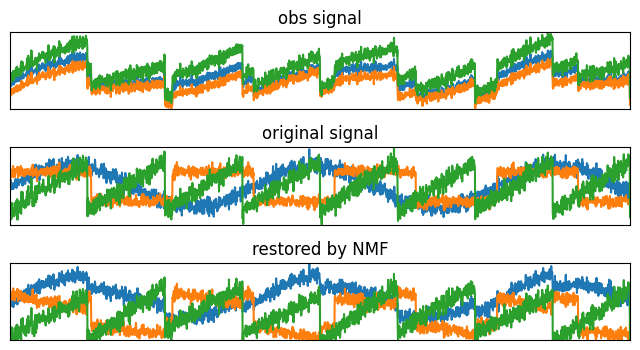

In [17]:
models = [X, S, S_]
names = ['obs signal',
         'original signal',
         'restored by NMF']

fig, axes = plt.subplots(3, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    ax.margins(0)

<h1>KMeans 클러스터링</h1>

In [19]:
x, y = make_blobs( n_samples=200, centers=3, cluster_std=2, random_state=42)

In [21]:
x, y

(array([[  8.37142786,   2.92083553],
        [ -7.74868783,  10.65809114],
        [ -6.90412074,  -8.67461834],
        [ -9.77579587,  -9.69503714],
        [ -8.05835671,  -5.1809054 ],
        [ -5.38503998,  -5.65936906],
        [ -2.89391955,   9.61738081],
        [ -7.8217038 ,  -6.41600972],
        [  4.11056517,   7.41350802],
        [ -5.25390295,  -5.62085191],
        [  2.78601789,   1.85411897],
        [  5.09479871,   4.58745519],
        [  6.80598132,   4.08077379],
        [  3.66915174,   2.13691796],
        [  0.58959366,   2.34607831],
        [ -8.53761721,  -8.00047167],
        [ -2.65321787,  11.02135192],
        [ -8.52406798,  -6.39273517],
        [  6.01239922,  -1.25226206],
        [ -3.70759356,  -9.35574059],
        [  8.88419123,   4.03810021],
        [  3.68998821,   0.66651122],
        [ -6.23419007,  -8.53457148],
        [ -2.37414121,   6.16478976],
        [ -5.51572125,  -7.50064311],
        [ -3.86304162,  10.23763871],
        [ -4

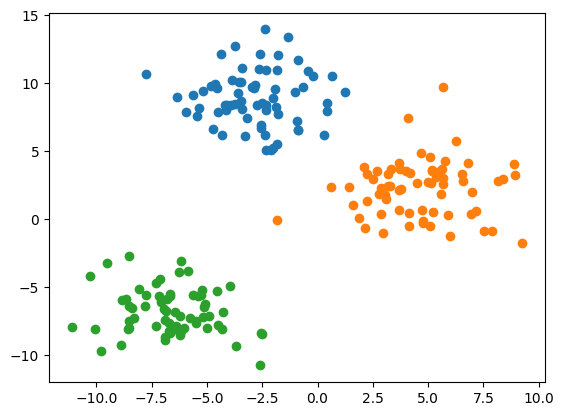

In [20]:
for t in np.unique(y):
    plt.scatter(x[y==t, 0],x[y==t,1] )
plt.show()

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
clusters = kmeans.predict(x)

clusters

array([2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 0,
       2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1,
       2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2,
       0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0,
       2, 2], dtype=int32)

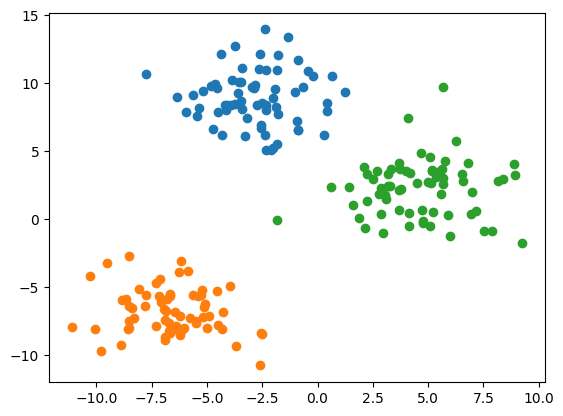

In [68]:
for t in np.unique(clusters):
    plt.scatter(x[clusters==t, 0],x[clusters==t,1] )
plt.show()

In [71]:
print( kmeans.cluster_centers_, '\n' )
print( kmeans.labels_ )

[[-2.80844495  8.9008503 ]
 [-6.61116042 -6.82277715]
 [ 4.62448572  2.22925786]] 

[2 0 1 1 1 1 0 1 2 1 2 2 2 2 2 1 0 1 2 1 2 2 1 0 1 0 0 1 0 2 2 2 1 1 0 0 1
 0 1 0 2 0 1 2 1 2 2 1 2 0 1 0 1 0 0 0 1 2 0 2 1 0 1 1 1 1 0 0 1 0 0 1 0 2
 0 2 2 0 2 0 0 2 2 1 1 1 1 0 2 1 2 0 0 0 2 1 0 2 2 0 1 1 0 1 0 2 1 2 2 1 2
 2 0 1 0 1 1 0 0 0 1 2 0 1 1 2 0 0 2 0 2 1 0 1 1 2 2 2 0 2 0 0 1 2 2 0 2 1
 1 2 0 1 2 1 2 1 1 0 2 2 0 2 2 1 0 2 2 0 1 2 1 0 2 1 0 2 0 0 0 2 0 2 1 1 1
 0 2 2 2 0 0 2 1 1 0 1 0 0 2 2]


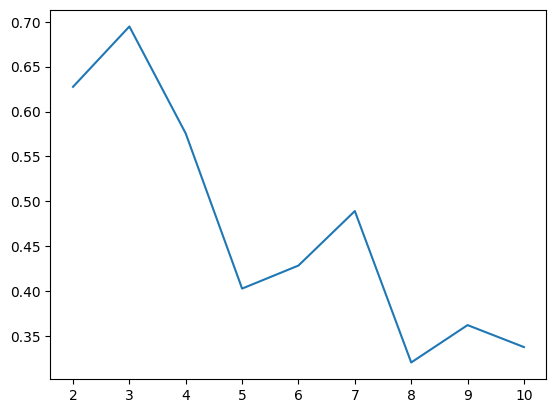

In [86]:
#군집 평가 실루엣 스코어
from sklearn.metrics import silhouette_score

scores = []
range = np.arange(2,11)
for n_cluster in range:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(x)
    predicted_clusters = kmeans.predict(x)
    score = silhouette_score(x, predicted_clusters)
    scores.append(score)

plt.plot(range, scores)


In [87]:
from sklearn.datasets import load_iris

iris_data = load_iris()
x = iris_data['data']
y = iris_data['target']

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
predicted_clusters = kmeans.predict(x)

In [89]:
predicted_clusters

array([0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [101]:
type(iris_data)

sklearn.utils._bunch.Bunch

In [104]:
iris_df = pd.DataFrame(
    np.append(x, predicted_clusters.reshape(150, -1), axis=1),
    columns=iris_data['feature_names'] + ['cluster']  # 열 이름 설정
)

In [107]:
iris_df.groupby('cluster').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0.0,5.193750,3.631250,1.475000,0.271875
1.0,6.314583,2.895833,4.973958,1.703125
2.0,4.731818,2.927273,1.772727,0.350000
